In [39]:
pip install folium

     |████████████████████████████████| 96 kB 8.2 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np

#read data
df = pd.read_csv("onlinedeliverydata.csv")
print(df.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  ...  \
0              Post Graduate            4   12.9766    77.5993    560001  ...   
1                   Graduate            3   12.9770    77.5773    560009  ...   
2              Post Graduate            3   12.9551    77.6593    560017  ...   
3                   Graduate            6   12.9473    77.5616    560019  ...   
4              Post Graduate            4   12.9850    77.5533    560010  ...   

     Less Delivery time High Quality of package       Number of calls  \
0  Moderately Important    Moderately Important  Moderately Important   
1     

In [4]:
#information on all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [53]:
print(df)

     Age  Gender Marital Status Occupation  Monthly Income  \
0     20  Female         Single    Student       No Income   
1     24  Female         Single    Student  Below Rs.10000   
2     22    Male         Single    Student  Below Rs.10000   
3     22  Female         Single    Student       No Income   
4     22    Male         Single    Student  Below Rs.10000   
..   ...     ...            ...        ...             ...   
383   23  Female         Single    Student       No Income   
384   23  Female         Single    Student       No Income   
385   22  Female         Single    Student       No Income   
386   23    Male         Single    Student  Below Rs.10000   
387   23    Male         Single    Student       No Income   

    Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                Post Graduate            4   12.9766    77.5993    560001   
1                     Graduate            3   12.9770    77.5773    560009   
2                Post

In [72]:
df.drop(columns = df.columns[10:53])

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Language barrier is also one major issue. Mosl...


In [5]:
#statistics of the data
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [6]:
#number of colums/rows
df.shape

(388, 55)

In [7]:
#replace string values to numbers
df = df.replace(['no income', 'below rs.10000', '10001 to 25000', '25001 to 50000', 'more than 50000'], ['0', '<10k', '10k-25k', '25k-50k', '>50k'])
df = df.replace(['yes', 'no', 'maybe'], [1, 0, 2])
df = df.replace(['strongly disagree', 'disagree', 'neutral', 'agree', 'strongly agree'], [1,2,3,4,5])
df = df.replace(['unimportant', 'slightly important','important', 'moderately important', 'very important'], [1,2,3,4,5])

Text(0.5, 1.0, 'Age of Customers')

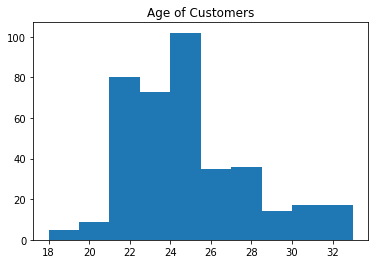

In [11]:
#histogram of age
plt.hist(df['Age'])
plt.title("Age of Customers")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe4d60577f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe4d6057e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe4d6057520>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe4d60c8370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe4d60c8640>],
 'means': []}

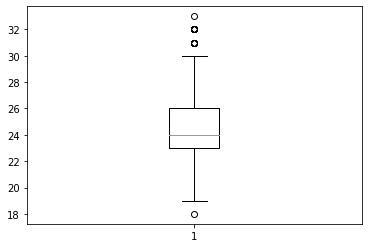

In [12]:
#Boxplot of the Age
plt.boxplot(df['Age'])
#Most customers are in the age from 21-25 with the average age being 24 years old.
#The youngest customer is 18 and the oldest is 33.

Text(0.5, 1.0, 'Age vs Gender')

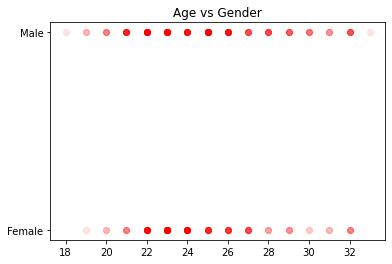

In [33]:
#Scatter plot of the Age vs Gender
s = plt.scatter(df["Age"], df["Gender"], color = 'r', alpha = .1)
plt.title("Age vs Gender")

<AxesSubplot:>

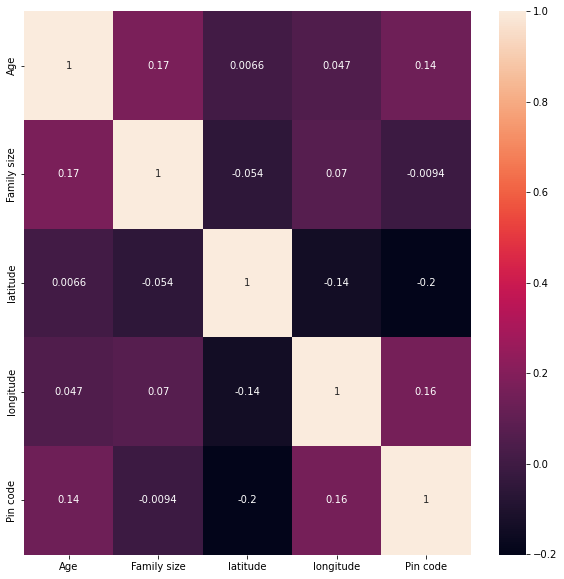

In [35]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df.corr(), ax = ax, annot = True)


In [41]:
%matplotlib inline

x = df.groupby(['latitude', 'longitude', 'Pin code']).size().reset_index()
x.columns = ['latitude', 'longitude', 'pincode', 'frequency']
x.sort_values(by=['frequency'], ascending=False, inplace=True)

latitude = 12.972442
longitude = 77.580643
delivery_map = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lon, freq, pin in zip(x['latitude'], x['longitude'], x['frequency'], x['pincode']):
    folium.CircleMarker([lat, lon], radius=freq, 
                        popup = ('Pincode: ' + str(pin) + '<br>' 
                                 '# of customers: ' + str(freq)
                                ), 
                        tooltip='Click to expand',
                        color='b', 
                        fill_color='red', 
                        fill=True, 
                        fill_opacity=0.6).add_to(delivery_map)

In [42]:
delivery_map

NameError: name 'nested_piechart' is not defined

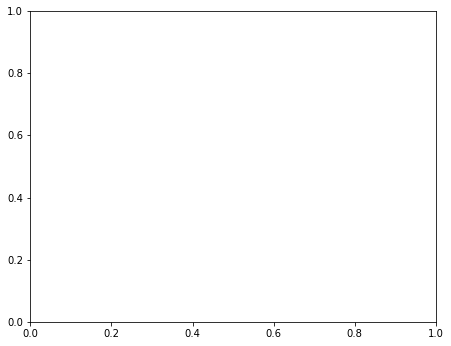